In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from code.fasttext.embedding_utils import TableEncoder, compare_embeddings_of, show_most_similar_rows

In [2]:
stadium_df = pd.read_csv(
    '/home/giovanni/unimore/TESI/src/data/uk_football/List_of_football_stadiums_in_England_1.csv'
)
pl1_df = pd.read_csv(
    '/home/giovanni/unimore/TESI/src/data/uk_football/Premier_League_1.csv'
)

In [3]:
stadium_df.dropna(axis='columns', how='all', inplace=True)
pl1_df.dropna(axis='columns', how='all', inplace=True)

In [5]:
tabenc = TableEncoder()

## Comparing Columns

In [6]:
m = pd.merge(
        pd.merge(
        compare_embeddings_of(stadium_df, pl1_df, tabenc, 'columns'),
        compare_embeddings_of(stadium_df, pl1_df, tabenc, 'columns', add_label=True),
        on=['C1', 'C2'],
        suffixes=['', '_wlabel']
    ),
    compare_embeddings_of(stadium_df, pl1_df, tabenc, 'columns', keepnumbers=False),
    on=['C1', 'C2'],
    suffixes=['', '_nonum']
)
m['delta1'] = (m['cosine similarity'] - m['cosine similarity_wlabel']).apply(lambda x: format(x, ".3f"))
m['delta2'] = (m['cosine similarity'] - m['cosine similarity_nonum']).apply(lambda x: format(x, ".3f"))

In [9]:
pd.concat([m.head(), m.tail()])

,C1,C2,cosine similarity,cosine similarity_wlabel,cosine similarity_nonum,delta1,delta2
0,Stadium,Stadium,0.973824,0.97146,0.973984,0.002,-0.000
1,Capacity,Capacity,0.970957,0.970664,<NA>,0.000,nan
2,Town / City,Location,0.941814,0.940012,0.941814,0.002,0.000
3,Team,Team,0.911942,0.910833,0.911942,0.001,0.000
4,Rank (England only),Capacity,0.850256,0.849961,<NA>,0.000,nan
19,Rank (England only),Stadium,0.095262,0.090614,0.095262,0.005,0.000
20,Rank (England only),Location,0.08983,0.092072,0.08983,-0.002,0.000
21,Capacity,Stadium,0.086786,0.081897,<NA>,0.005,nan
22,Capacity,Team,0.072298,0.079158,<NA>,-0.007,nan
23,Rank (England only),Team,0.027893,0.039911,0.027893,-0.012,0.000


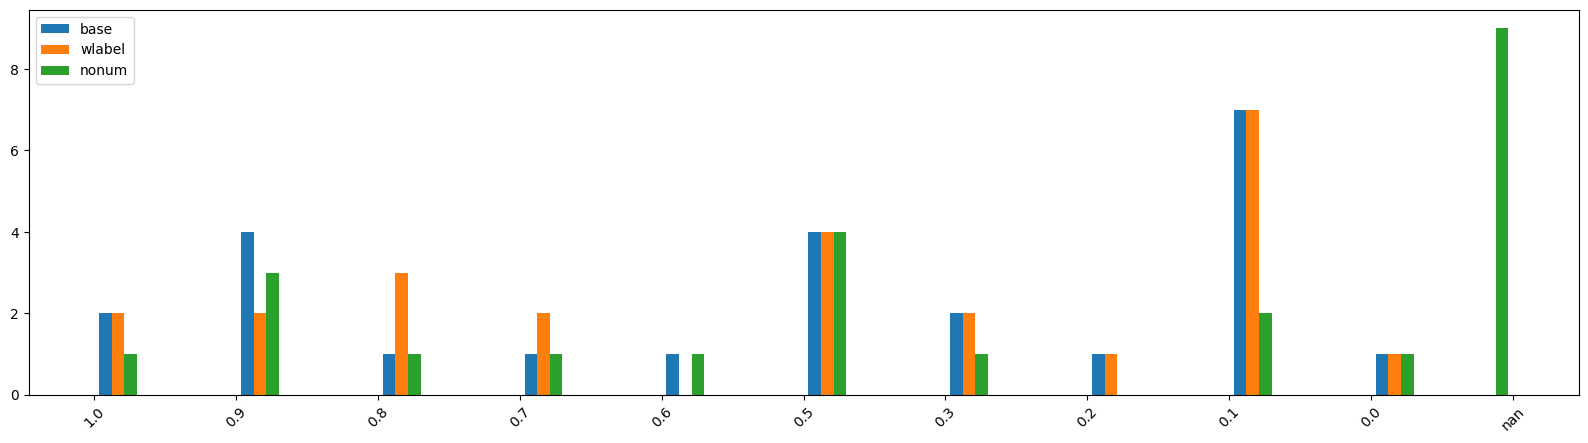

In [20]:
plt.figure(figsize=(20, 5))
plt.hist(
    [
        m['cosine similarity'].apply(lambda x: format(x, '.1f')).values,
        m['cosine similarity_wlabel'].apply(lambda x: format(x, '.1f')).values,
        m['cosine similarity_nonum'].apply(lambda x: format(x, '.1f')).values
    ],
    bins=30,
    label=['base', 'wlabel', 'nonum']
)
plt.xticks(rotation=45)
plt.legend()
plt.show()